In [ ]:

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:15 http://security.ubuntu.com/ubuntu bionic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [ ]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

# download webdriver from https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/
# and put the executable in /usr/local/bin

In [ ]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.protothema.gr/anazitisi/?q=%CE%BA%CE%BF%CF%81%CF%89%CE%BD%CE%BF%CF%8A%CF%8C%CF%82&Category=338&Order=Related")


    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 5585
height: 5585
height = 5585
OK


In [ ]:

soup = BeautifulSoup(driver.page_source, "html.parser")

In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))

20


In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

,headline,url,date
0,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,https://www.protothema.gr/zoi/article/985160/k...,2020-03-16T22:31:00+02:00
1,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,https://www.protothema.gr/zoi/article/997163/k...,2020-04-17T19:30:00+03:00
2,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,https://www.protothema.gr/zoi/article/975560/k...,2020-02-16T18:08:27+02:00
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,https://www.protothema.gr/zoi/article/1135902/...,2021-06-22T12:56:00+03:00
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,https://www.protothema.gr/koronoios-live/artic...,2020-05-12T16:41:00+03:00
5,\nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...,https://www.protothema.gr/koronoios-live/artic...,2020-04-23T19:17:16+03:00
6,\nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...,https://www.protothema.gr/zoi/article/999232/k...,2020-04-24T19:06:00+03:00
7,\nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...,https://www.protothema.gr/zoi/article/984127/k...,2020-03-22T16:47:00+02:00
8,\nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...,https://www.protothema.gr/zoi/article/1114293/...,2021-04-13T17:33:00+03:00
9,\nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...,https://ygeiamou.gr/%ce%b5%cf%80%ce%b9%cf%83%c...,2021-01-20T18:42:28+02:00


In [ ]:
df.sort_values(by='date', ascending = False)

,headline,url,date
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,https://www.protothema.gr/zoi/article/1135902/...,2021-06-22T12:56:00+03:00
8,\nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...,https://www.protothema.gr/zoi/article/1114293/...,2021-04-13T17:33:00+03:00
9,\nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...,https://ygeiamou.gr/%ce%b5%cf%80%ce%b9%cf%83%c...,2021-01-20T18:42:28+02:00
16,\nLockdown – Κορωνοϊός: Το αποτελεσματικό αντί...,https://www.protothema.gr/zoi/article/1071669/...,2020-12-04T16:58:00+02:00
17,\nΚορωνοϊός: Ξεγελά τον οργανισμό αλλά και την...,https://www.protothema.gr/zoi/article/1070157/...,2020-11-30T08:06:00+02:00
10,\nΚορωνοϊός: Το «αθώο» σύμπτωμα που εμφανίζει ...,https://www.protothema.gr/zoi/article/1018034/...,2020-08-31T08:19:00+03:00
18,\nΚορωνοϊός: Τα φθηνά φάρμακα που μειώνουν τον...,https://www.protothema.gr/zoi/article/1038174/...,2020-08-26T10:55:00+03:00
19,\nΚορωνοϊός: Ποιες καιρικές συνθήκες ευνοούν τ...,https://www.protothema.gr/zoi/article/1028779/...,2020-07-22T10:45:00+03:00
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,https://www.protothema.gr/koronoios-live/artic...,2020-05-12T16:41:00+03:00
11,\nKορωνοϊός: Οι απαραίτητες απεικονιστικές εξε...,https://www.protothema.gr/zoi/article/1000057/...,2020-04-27T09:47:00+03:00


In [ ]:

df.tail()

,headline,url,date
15,\nΚορωνοϊός Covid-19: Τι πρέπει να γνωρίζουμε ...,https://www.protothema.gr/zoi/article/974624/k...,2020-02-13T13:38:00+02:00
16,\nLockdown – Κορωνοϊός: Το αποτελεσματικό αντί...,https://www.protothema.gr/zoi/article/1071669/...,2020-12-04T16:58:00+02:00
17,\nΚορωνοϊός: Ξεγελά τον οργανισμό αλλά και την...,https://www.protothema.gr/zoi/article/1070157/...,2020-11-30T08:06:00+02:00
18,\nΚορωνοϊός: Τα φθηνά φάρμακα που μειώνουν τον...,https://www.protothema.gr/zoi/article/1038174/...,2020-08-26T10:55:00+03:00
19,\nΚορωνοϊός: Ποιες καιρικές συνθήκες ευνοούν τ...,https://www.protothema.gr/zoi/article/1028779/...,2020-07-22T10:45:00+03:00


In [ ]:
df.to_csv("covid.csv", index=False)

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/My Drive/covid.csv', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/covid.csv

Hello Google Drive!

In [ ]:
df

,headline,url,date
0,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,https://www.protothema.gr/zoi/article/985160/k...,2020-03-16T22:31:00+02:00
1,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,https://www.protothema.gr/zoi/article/997163/k...,2020-04-17T19:30:00+03:00
2,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,https://www.protothema.gr/zoi/article/975560/k...,2020-02-16T18:08:27+02:00
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,https://www.protothema.gr/zoi/article/1135902/...,2021-06-22T12:56:00+03:00
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,https://www.protothema.gr/koronoios-live/artic...,2020-05-12T16:41:00+03:00
5,\nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...,https://www.protothema.gr/koronoios-live/artic...,2020-04-23T19:17:16+03:00
6,\nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...,https://www.protothema.gr/zoi/article/999232/k...,2020-04-24T19:06:00+03:00
7,\nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...,https://www.protothema.gr/zoi/article/984127/k...,2020-03-22T16:47:00+02:00
8,\nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...,https://www.protothema.gr/zoi/article/1114293/...,2021-04-13T17:33:00+03:00
9,\nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...,https://ygeiamou.gr/%ce%b5%cf%80%ce%b9%cf%83%c...,2021-01-20T18:42:28+02:00


In [ ]:
df.head()

,headline,url,date
0,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,https://www.protothema.gr/zoi/article/985160/k...,2020-03-16T22:31:00+02:00
1,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,https://www.protothema.gr/zoi/article/997163/k...,2020-04-17T19:30:00+03:00
2,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,https://www.protothema.gr/zoi/article/975560/k...,2020-02-16T18:08:27+02:00
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,https://www.protothema.gr/zoi/article/1135902/...,2021-06-22T12:56:00+03:00
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,https://www.protothema.gr/koronoios-live/artic...,2020-05-12T16:41:00+03:00


In [ ]:
# Η εξόρυξη των δεδομένων έγινε με τη βοήθεια του Chrome Web Scraper. Eπισκέφτηκα τη σελίδα του Πρώτου Θέματος και στην αναζήτηση έγραψα τη λέξη : κορωνοιός. Ύστερα, πάτησα την επιλογή "πιο σχετικά", ώστε να εμφανιστούν τα άρθρα που επιθυμούσα.

In [ ]:
df = df.drop('url', axis = 1)


In [ ]:
df.shape

(20, 2)

In [ ]:
pd.set_option("display.max_rows",110)


In [ ]:
df

,headline,date
0,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,2020-03-16T22:31:00+02:00
1,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,2020-04-17T19:30:00+03:00
2,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,2020-02-16T18:08:27+02:00
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,2021-06-22T12:56:00+03:00
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,2020-05-12T16:41:00+03:00
5,\nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...,2020-04-23T19:17:16+03:00
6,\nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...,2020-04-24T19:06:00+03:00
7,\nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...,2020-03-22T16:47:00+02:00
8,\nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...,2021-04-13T17:33:00+03:00
9,\nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...,2021-01-20T18:42:28+02:00


In [ ]:
df.dtypes

headline    object
date        object
dtype: object

In [ ]:
df['date'].astype(str)

0     2020-03-16T22:31:00+02:00
1     2020-04-17T19:30:00+03:00
2     2020-02-16T18:08:27+02:00
3     2021-06-22T12:56:00+03:00
4     2020-05-12T16:41:00+03:00
5     2020-04-23T19:17:16+03:00
6     2020-04-24T19:06:00+03:00
7     2020-03-22T16:47:00+02:00
8     2021-04-13T17:33:00+03:00
9     2021-01-20T18:42:28+02:00
10    2020-08-31T08:19:00+03:00
11    2020-04-27T09:47:00+03:00
12    2020-04-24T14:35:00+03:00
13    2020-03-15T21:49:00+02:00
14    2020-03-08T14:10:00+02:00
15    2020-02-13T13:38:00+02:00
16    2020-12-04T16:58:00+02:00
17    2020-11-30T08:06:00+02:00
18    2020-08-26T10:55:00+03:00
19    2020-07-22T10:45:00+03:00
Name: date, dtype: object

In [ ]:
#μετατρέπω την ημερομηνία σε datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', utc=True)

In [ ]:
#Προσθέτω το χρόνο, το μήνα και την ημέρα 

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df.dtypes

headline                 object
date        datetime64[ns, UTC]
year                      int64
month                     int64
day                       int64
dtype: object

In [ ]:
df

,headline,date,year,month,day
0,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,2020-03-16 20:31:00+00:00,2020,3,16
1,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,2020-04-17 16:30:00+00:00,2020,4,17
2,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,2020-02-16 16:08:27+00:00,2020,2,16
3,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,2021-06-22 09:56:00+00:00,2021,6,22
4,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,2020-05-12 13:41:00+00:00,2020,5,12
5,\nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...,2020-04-23 16:17:16+00:00,2020,4,23
6,\nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...,2020-04-24 16:06:00+00:00,2020,4,24
7,\nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...,2020-03-22 14:47:00+00:00,2020,3,22
8,\nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...,2021-04-13 14:33:00+00:00,2021,4,13
9,\nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...,2021-01-20 16:42:28+00:00,2021,1,20


In [ ]:
df.head

<bound method NDFrame.head of                                              headline  ... day
0         \nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n  ...  16
1   \nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...  ...  17
2   \nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...  ...  16
3   \nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...  ...  22
4   \nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...  ...  12
5   \nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...  ...  23
6   \nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...  ...  24
7   \nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...  ...  22
8   \nΚορωνοϊός: Τα σοβαρά προβλήματα που προκαλεί...  ...  13
9   \nΚορωνοϊός: Το απροσδόκητο σημάδι που «μαρτυρ...  ...  20
10  \nΚορωνοϊός: Το «αθώο» σύμπτωμα που εμφανίζει ...  ...  31
11  \nKορωνοϊός: Οι απαραίτητες απεικονιστικές εξε...  ...  27
12  \nΚορωνοϊός: Πέντε τρόποι να νιώσουμε λιγότερο...  ...  24
13  \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για ...  ...  15
14  \nΚορωνοϊός: Πόσο επι

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



In [ ]:
df[df['year']==2020]['headline']

0           \nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n
1     \nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...
2     \nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...
4     \nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...
5     \nΑυτοεξέταση για τον κορωνοϊό μέσω smartphone...
6     \nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο...
7     \nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι δι...
10    \nΚορωνοϊός: Το «αθώο» σύμπτωμα που εμφανίζει ...
11    \nKορωνοϊός: Οι απαραίτητες απεικονιστικές εξε...
12    \nΚορωνοϊός: Πέντε τρόποι να νιώσουμε λιγότερο...
13    \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για ...
14    \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για ...
15    \nΚορωνοϊός Covid-19: Τι πρέπει να γνωρίζουμε ...
16    \nLockdown – Κορωνοϊός: Το αποτελεσματικό αντί...
17    \nΚορωνοϊός: Ξεγελά τον οργανισμό αλλά και την...
18    \nΚορωνοϊός: Τα φθηνά φάρμακα που μειώνουν τον...
19    \nΚορωνοϊός: Ποιες καιρικές συνθήκες ευνοούν τ...
Name: headline, dtype: object

In [ ]:
headline =df[df['year']==2020]['headline'].str.cat(sep = ' ')

In [ ]:
headline

'\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n \nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλληλης θεραπείας\n \nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-19\n \nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδιά - Ποια θεωρούνται ύποπτα κρούσματα\n \nΑυτοεξέταση για τον κορωνοϊό μέσω smartphones ανακοίνωσαν δύο εταιρείες\n \nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο ιό\n \nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι διαβητικοί ασθενείς\n \nΚορωνοϊός: Το «αθώο» σύμπτωμα που εμφανίζει το 85% των ασθενών\n \nKορωνοϊός: Οι απαραίτητες απεικονιστικές εξετάσεις και πότε γίνονται\n \nΚορωνοϊός: Πέντε τρόποι να νιώσουμε λιγότερο απελπισμένοι και αδύναμοι\n \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για τη μετάδοσή του\n \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για τη μετάδοσή του\n \nΚορωνοϊός Covid-19: Τι πρέπει να γνωρίζουμε και πώς θα προφυλαχθούμε\n \nLockdown – Κορωνοϊός: Το αποτελεσματικό αντίδοτο στην μοναξιά και την απομόνωση\n \nΚορωνοϊός: Ξεγελά τον οργανισμό αλλά και την συμπεριφορά μας

In [ ]:
list(STOPWORDS)[0:20]

['off',
 'am',
 'after',
 'i',
 'since',
 'too',
 "aren't",
 'whom',
 'but',
 "he'll",
 'down',
 'my',
 'that',
 'more',
 "can't",
 'from',
 "don't",
 'of',
 "shan't",
 'was']

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_md


✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
nlp = spacy.load('el_core_news_md')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['τούτο',
 'τόση',
 'προτού',
 'πρόπερσι',
 'είμαι',
 'όσο',
 'έξω',
 'ότου',
 'έτσι',
 'λοιπόν',
 'πλέον',
 'άρα',
 'καθώς',
 'κανένας',
 'εις',
 'η',
 'εκτός',
 'οποίος',
 'πάλι',
 'έχουμε']

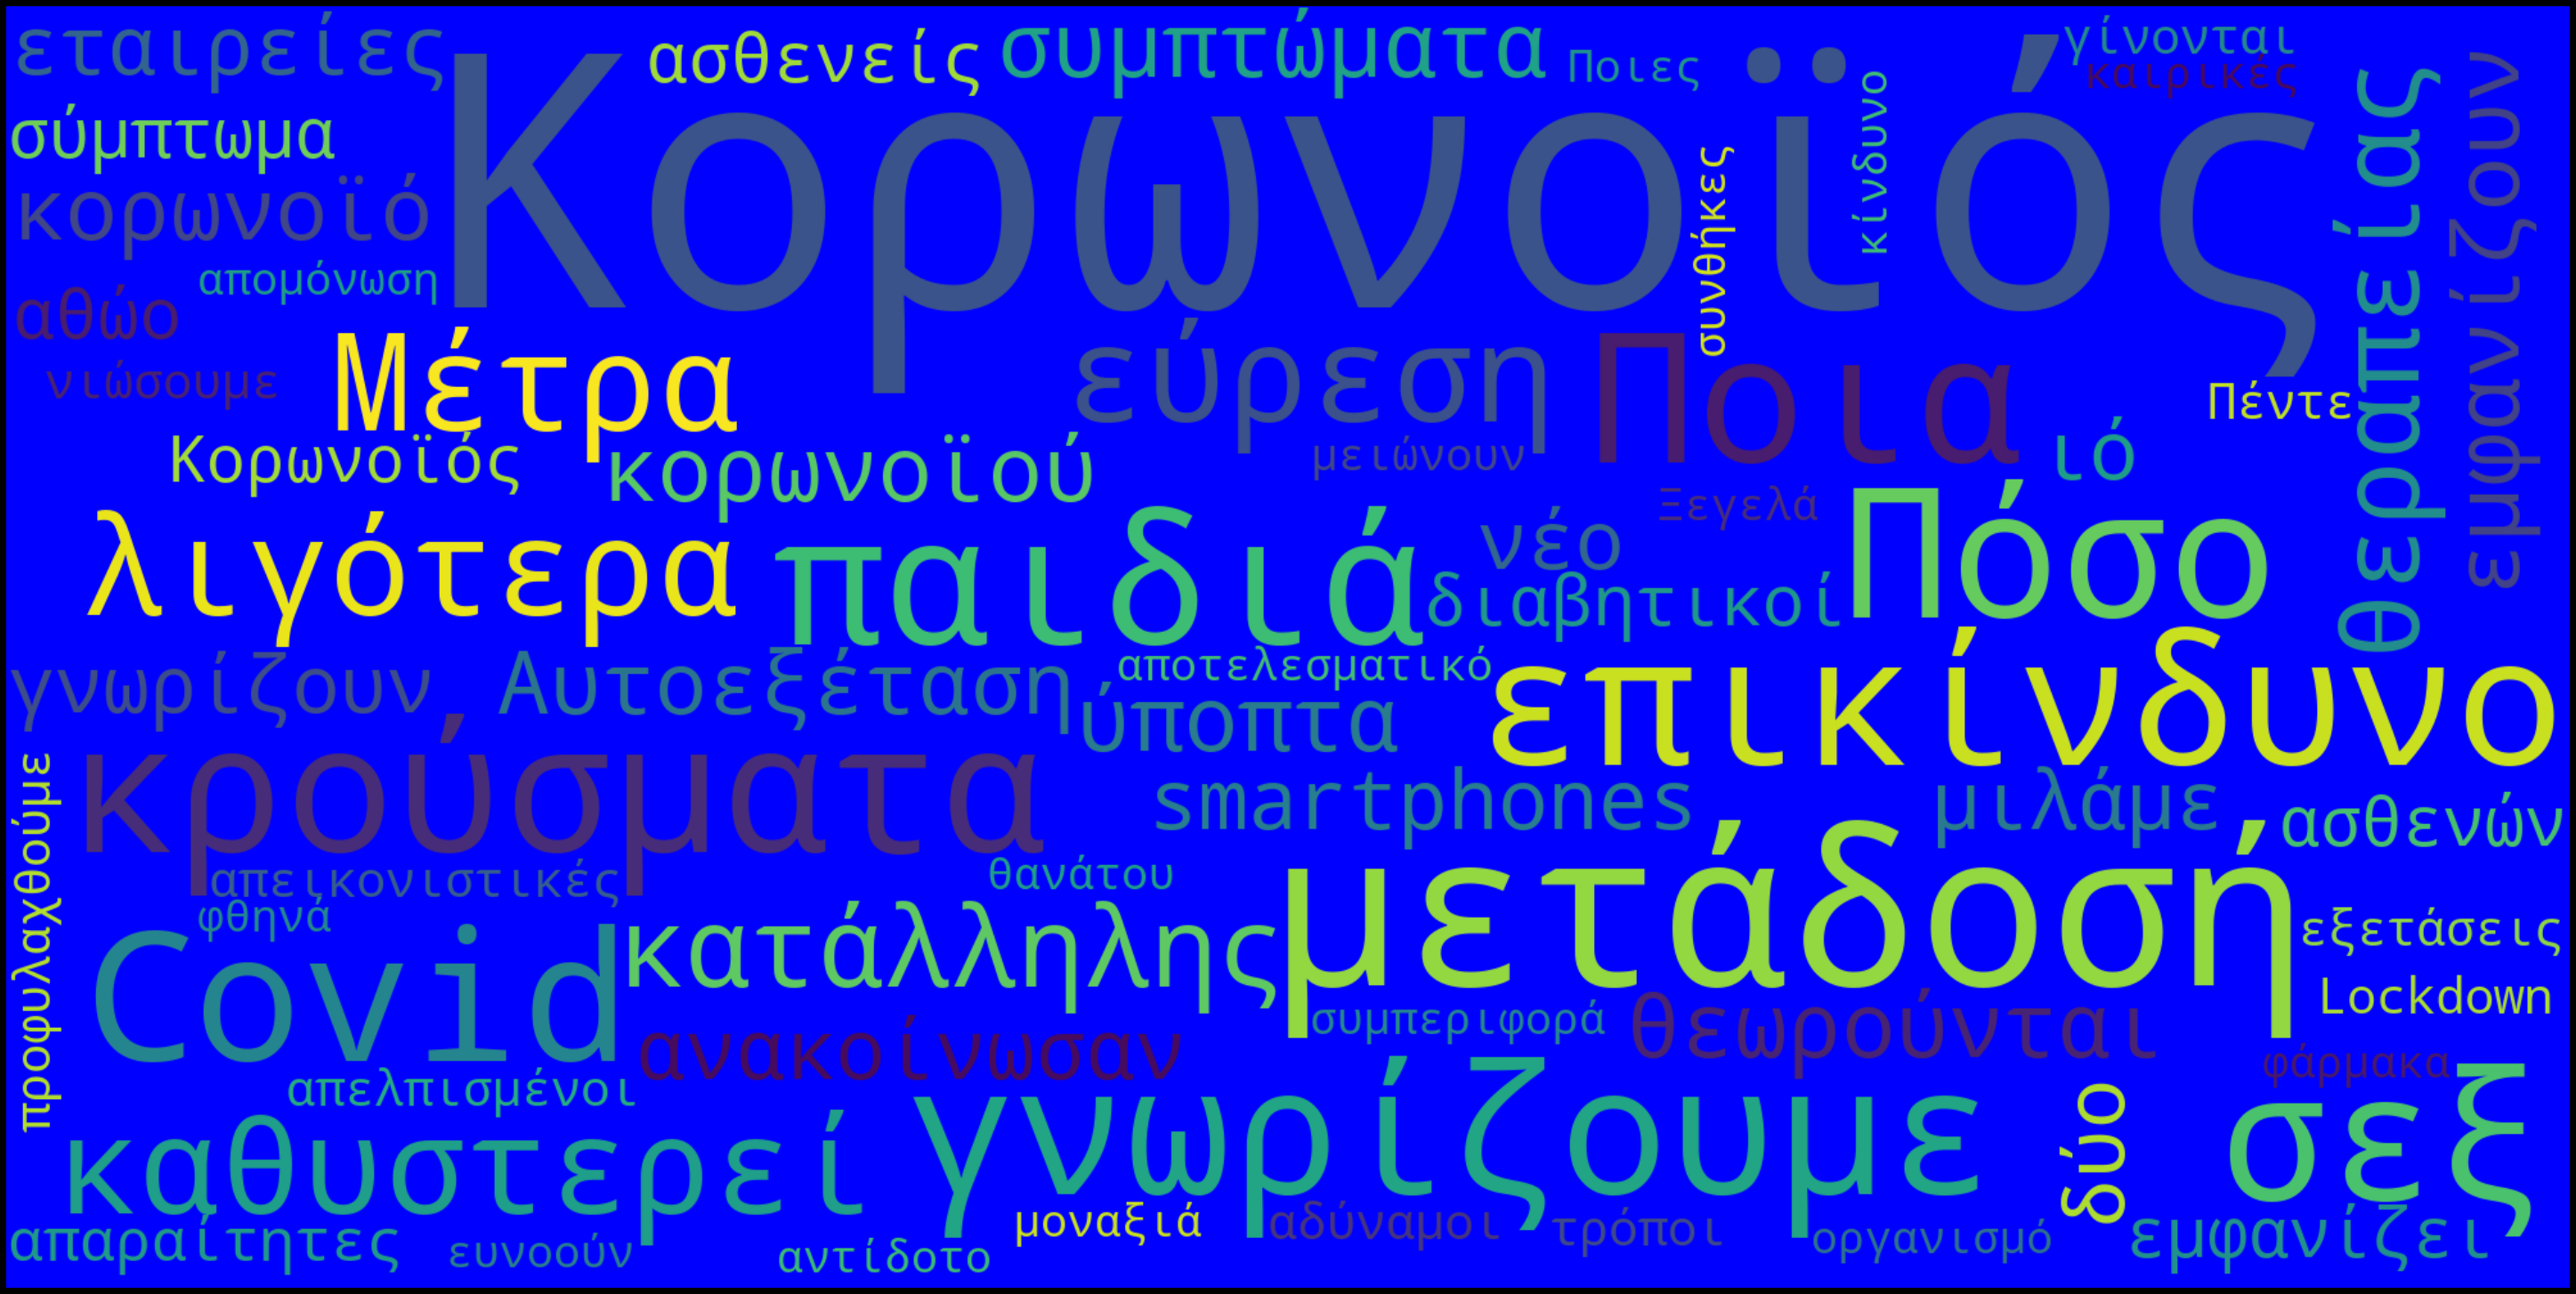

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(headline)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df['headline'][1]

'\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλληλης θεραπείας\n'

In [ ]:
doc = nlp(df['headline'][1])

In [ ]:
for token in doc:
    print(token.text, "----", token.lemma_, "----",token.pos_)


 ---- 
 ---- SPACE
Κορωνοϊός ---- κορωνοϊό ---- NOUN
: ---- : ---- PUNCT
Γιατί ---- γιατί ---- SCONJ
καθυστερεί ---- καθυστερώ ---- VERB
η ---- η ---- DET
εύρεση ---- εύρεση ---- ADJ
κατάλληλης ---- κατάλληλη ---- NOUN
θεραπείας ---- θεραπεία ---- NOUN

 ---- 
 ---- SPACE


In [ ]:
' '.join(token.lemma_ for token in doc)

'\n κορωνοϊό : γιατί καθυστερώ η εύρεση κατάλληλη θεραπεία \n'

In [ ]:
headline

'\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n \nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλληλης θεραπείας\n \nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-19\n \nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδιά - Ποια θεωρούνται ύποπτα κρούσματα\n \nΑυτοεξέταση για τον κορωνοϊό μέσω smartphones ανακοίνωσαν δύο εταιρείες\n \nΚορωνοϊός: Πώς μιλάμε στα παιδιά για τον νέο ιό\n \nΚορωνοϊός: Όλα όσα πρέπει να γνωρίζουν οι διαβητικοί ασθενείς\n \nΚορωνοϊός: Το «αθώο» σύμπτωμα που εμφανίζει το 85% των ασθενών\n \nKορωνοϊός: Οι απαραίτητες απεικονιστικές εξετάσεις και πότε γίνονται\n \nΚορωνοϊός: Πέντε τρόποι να νιώσουμε λιγότερο απελπισμένοι και αδύναμοι\n \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για τη μετάδοσή του\n \nΚορωνοϊός: Πόσο επικίνδυνο είναι το σεξ για τη μετάδοσή του\n \nΚορωνοϊός Covid-19: Τι πρέπει να γνωρίζουμε και πώς θα προφυλαχθούμε\n \nLockdown – Κορωνοϊός: Το αποτελεσματικό αντίδοτο στην μοναξιά και την απομόνωση\n \nΚορωνοϊός: Ξεγελά τον οργανισμό αλλά και την συμπεριφορά μας

In [ ]:
full_doc = nlp(headline)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[1:764]

' κορωνοϊό : μέτρο για λιγότερα κρούσμαα \n \n κορωνοϊό : γιατί καθυστερώ η εύρεση κατάλληλη θεραπεία \n \n Κορωνοϊός : όλος όσα γνωρίζω για τον covid-19 \n \n ποια συμπτώματο κορωνοϊός εμφανίζω τα παιδί - ποια θεωρούνται ύποπτα κρούσμαα \n \n αυτοεξέταση για τον κορωνοϊό μέσω smartphones ανακοίνωσαν δύο εταιρεία \n \n κορωνοϊό : πώς μιλώ στα παιδί για τον νέος ιό \n \n κορωνοϊό : όλος όσα πρέπει να γνωρίζω οι διαβητικός ασθενείς \n \n κορωνοϊό : το « αθώος » σύμπτωμα που εμφανίζω το 85% των ασθενών \n \n kορωνοϊός : οι απαραίτητες απεικονιστικός εξετάσει και πότε γίνομαι \n \n Κορωνοϊός : πέντε τρόποι να νιώσω λιγότερο απελπισμένος και αδύναμος \n \n κορωνοϊό : πόσο επικίνδυνος είναι το σεξ για τη μετάδοσή του \n \n Κορωνοϊός : πόσο επικίνδυνος είναι το σεξ για τη μετάδοσή τ'

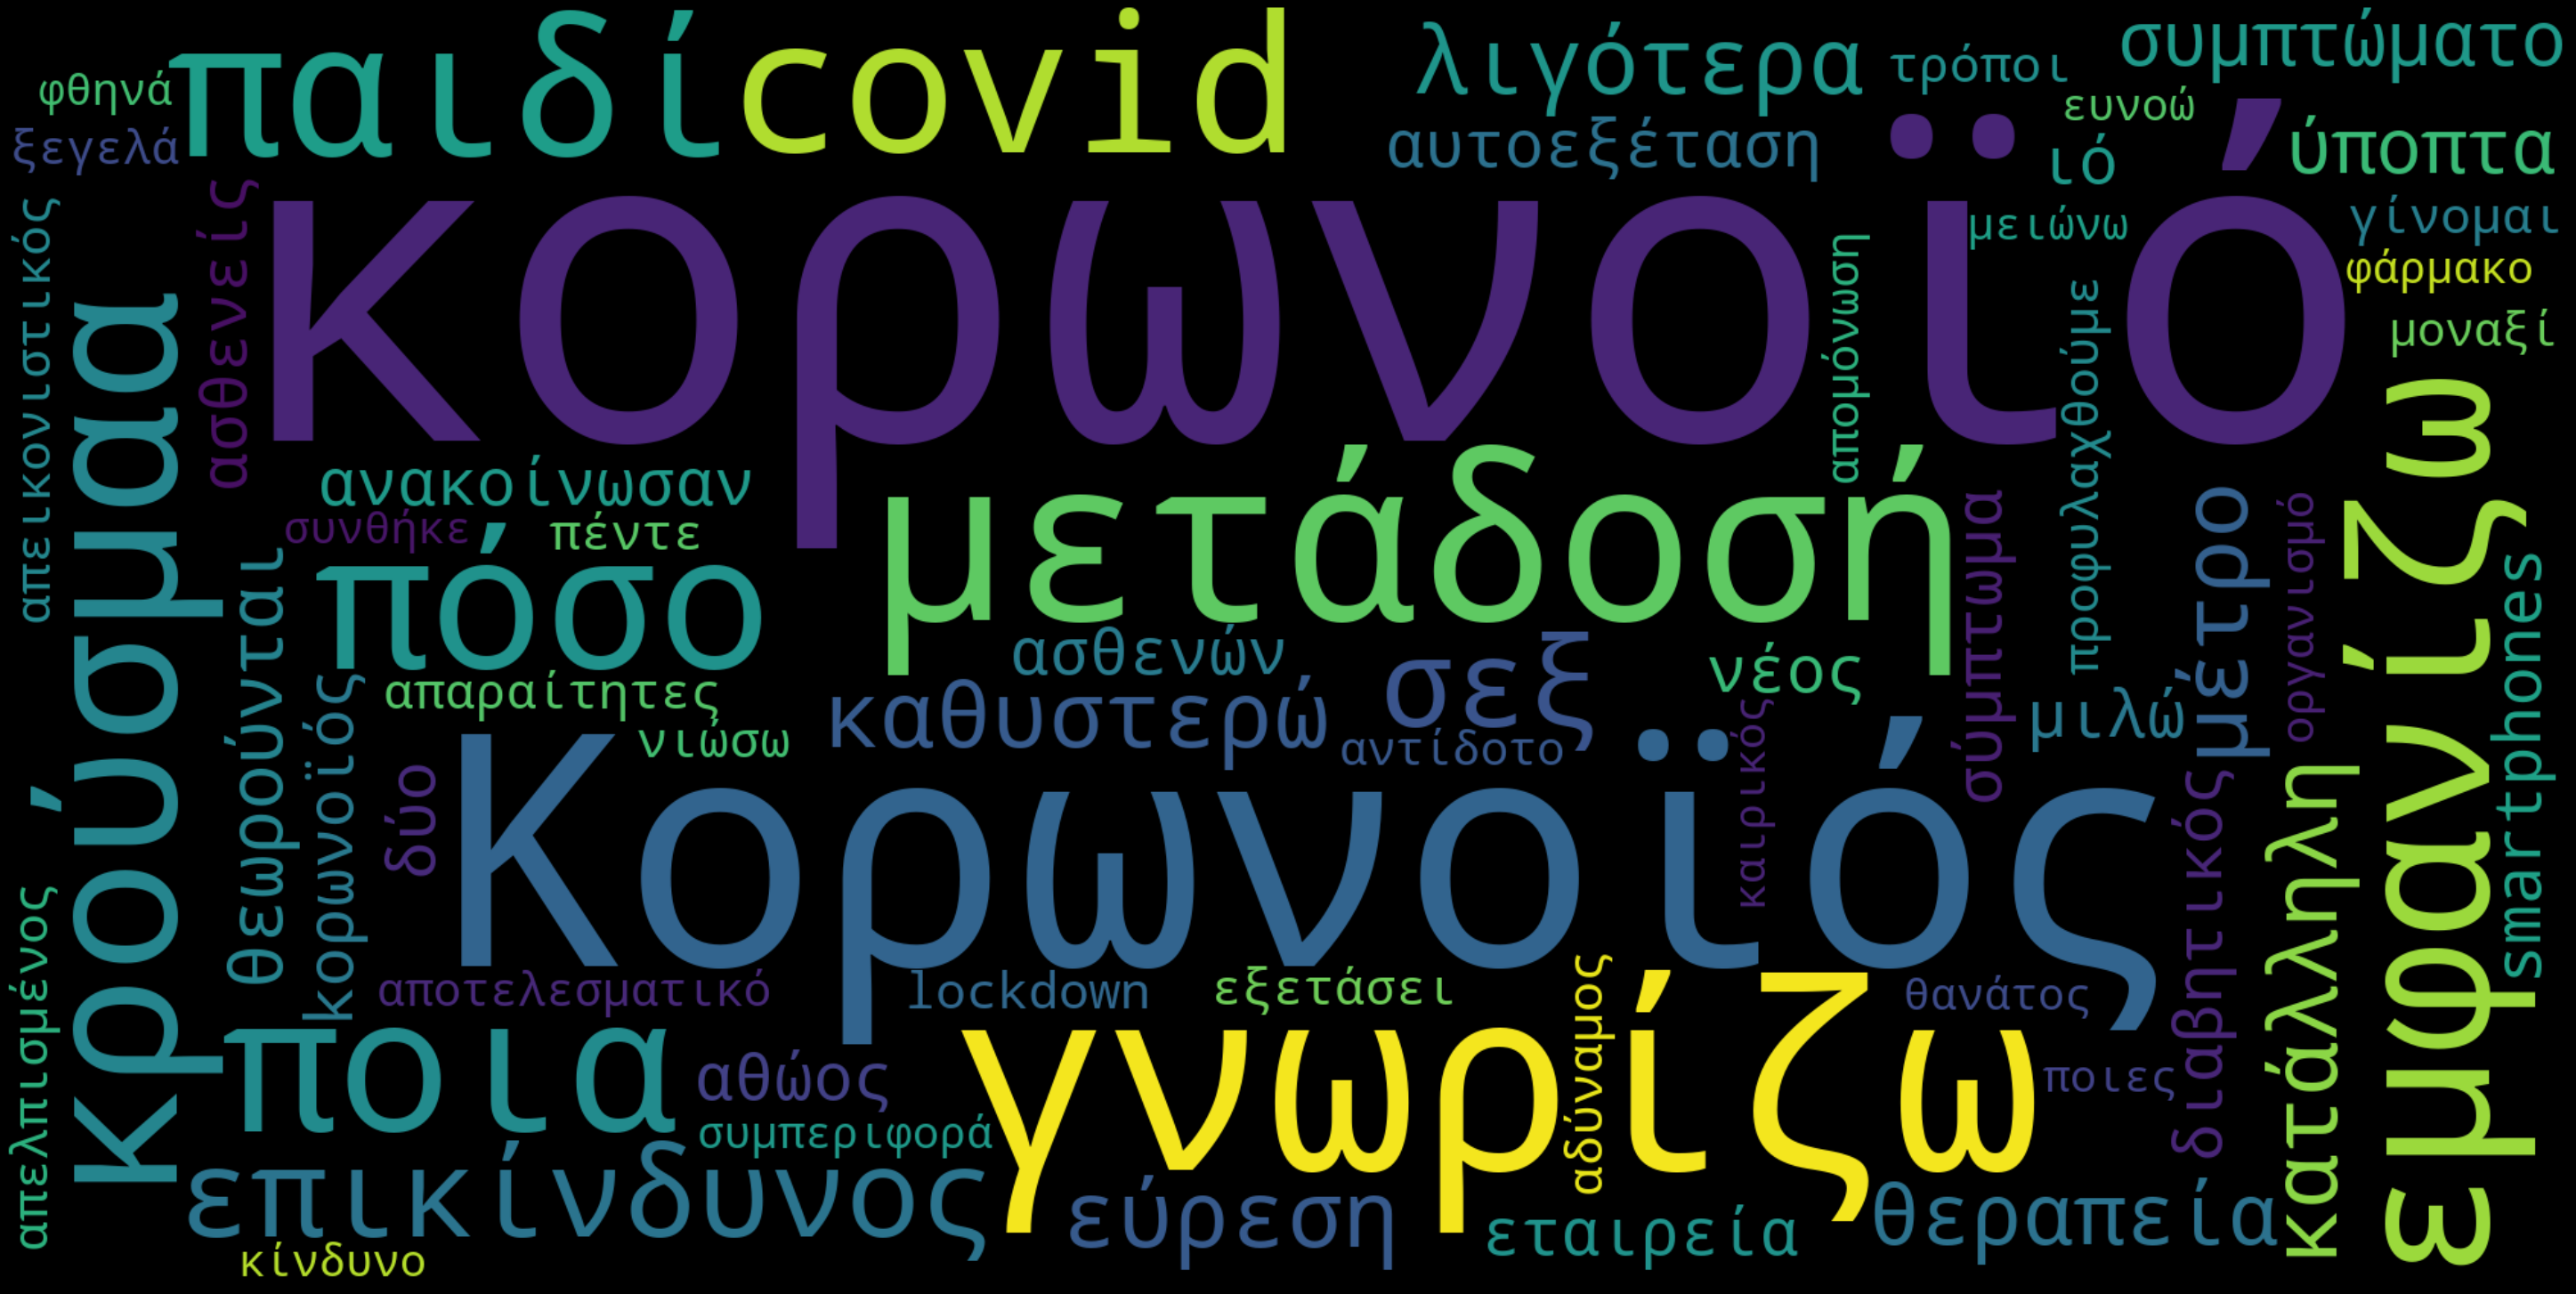

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:
count_vector.shape

(20, 108)

In [ ]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,19,85,covid,kορωνοϊός,lockdown,smartphones,αδύναμοι,αθώο,αλλά,ανακοίνωσαν,αντίδοτο,αντιμετωπίζονται,απαραίτητες,απεικονιστικές,απελπισμένοι,απομόνωση,αποτελεσματικό,απροσδόκητο,ασθενείς,ασθενών,αυτοεξέταση,γίνονται,για,γιατί,γνωρίζουμε,γνωρίζουν,διαβητικοί,δύο,είναι,εμφανίζει,εμφανίζουν,εξετάσεις,επικίνδυνο,εταιρείες,ευαίσθητο,ευνοούν,εύρεση,θα,θανάτου,θεραπείας,...,οι,οργανισμό,πέντε,παιδιά,ποια,ποιες,που,πρέπει,προβλήματα,προκαλεί,προφυλαχθούμε,πόσο,πότε,πώς,σεξ,σημάδι,σοβαρά,στα,στην,στόχος,συμπεριφορά,συμπτώματα,συνθήκες,σύμπτωμα,τα,τη,την,τι,το,τον,του,τρόποι,των,φάρμακα,φθηνά,όλα,όργανο,όσα,ότι,ύποπτα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#cv.vocabulary_

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,19,85,covid,kορωνοϊός,lockdown,smartphones,αδύναμοι,αθώο,ανακοίνωσαν,αντίδοτο,αντιμετωπίζονται,απαραίτητες,απεικονιστικές,απελπισμένοι,απομόνωση,αποτελεσματικό,απροσδόκητο,ασθενείς,ασθενών,αυτοεξέταση,γίνονται,γνωρίζουμε,γνωρίζουν,διαβητικοί,δύο,εμφανίζει,εμφανίζουν,εξετάσεις,επικίνδυνο,εταιρείες,ευαίσθητο,ευνοούν,εύρεση,θανάτου,θεραπείας,θεωρούνται,ιού,ιό,κίνδυνο,καθυστερεί,καιρικές,καρδιά,κατάλληλης,κορωνοϊού,κορωνοϊό,κορωνοϊός,κρούσματα,λιγότερα,μέτρα,μαρτυρά,μειώνουν,μετάδοσή,μιλάμε,μοναξιά,νέο,νιώσουμε,νοσείτε,ξεγελά,οργανισμό,πέντε,παιδιά,ποια,ποιες,προβλήματα,προκαλεί,προφυλαχθούμε,πόσο,σεξ,σημάδι,σοβαρά,στόχος,συμπεριφορά,συμπτώματα,συνθήκες,σύμπτωμα,τρόποι,φάρμακα,φθηνά,όργανο,ύποπτα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
#from html import unescape
#def my_tokenizer(doc):
            
#    # apply the preprocessing and tokenzation steps
#    doc_clean = unescape(doc).lower()
#    tokens = nlp(doc_clean)
#    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
#            
#    # use CountVectorizer's _word_ngrams built in method
#    # to remove stop words and extract n-grams
#    return(lemmatized_tokens)

In [ ]:
# cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
# count_vector = cv.fit_transform(short_tweets['text'])
# results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
# results.head()


In [ ]:
df['headline'] = df['headline'].str.replace("κορωνοϊό" ,"κορωνοϊός").str.replace("κορωνοϊός", "κορωνοϊός")

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) 
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(15)



,19,covid,γνωρίζουμε,επικίνδυνο,κορωνοϊός,κορωνοϊόςςς,κρούσματα,λιγότερα,μέτρα,μαρτυρά,μετάδοσή,μιλάμε,μοναξιά,νέο,νιώσουμε,νοσείτε,παιδιά,ποια,πόσο,σεξ
0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


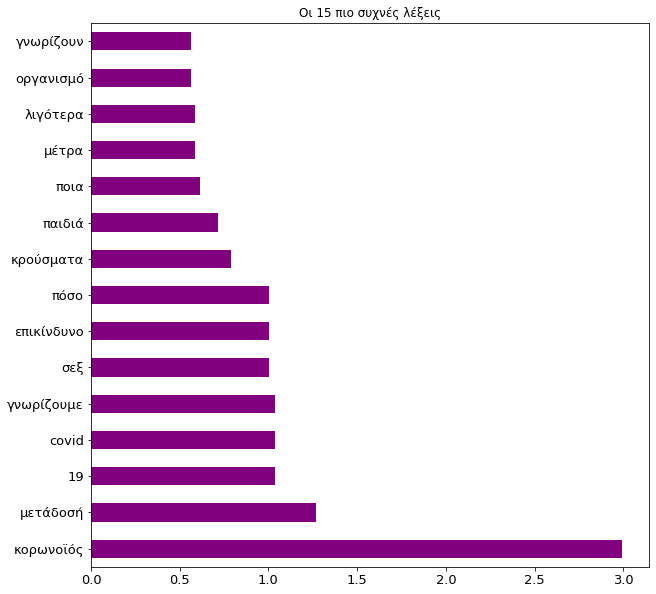

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head (15).plot(kind='barh',color='purple',figsize=(10,10),title='Οι 15 πιο συχνές λέξεις',fontsize=13)

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, 
                     ngram_range=(2, 2) )  
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,19 γνωρίζουμε,covid 19,επικίνδυνο σεξ,κορωνοϊός ξεγελά,κορωνοϊός πέντε,κορωνοϊός ποιες,κορωνοϊός πόσο,κορωνοϊός σοβαρά,κορωνοϊός φθηνά,κορωνοϊόςςς smartphones,λιγότερα κρούσματα,μέτρα λιγότερα,μαρτυρά νοσείτε,μειώνουν κίνδυνο,μιλάμε παιδιά,μοναξιά απομόνωση,νέο ιό,νιώσουμε απελπισμένοι,πόσο επικίνδυνο,σεξ μετάδοσή
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


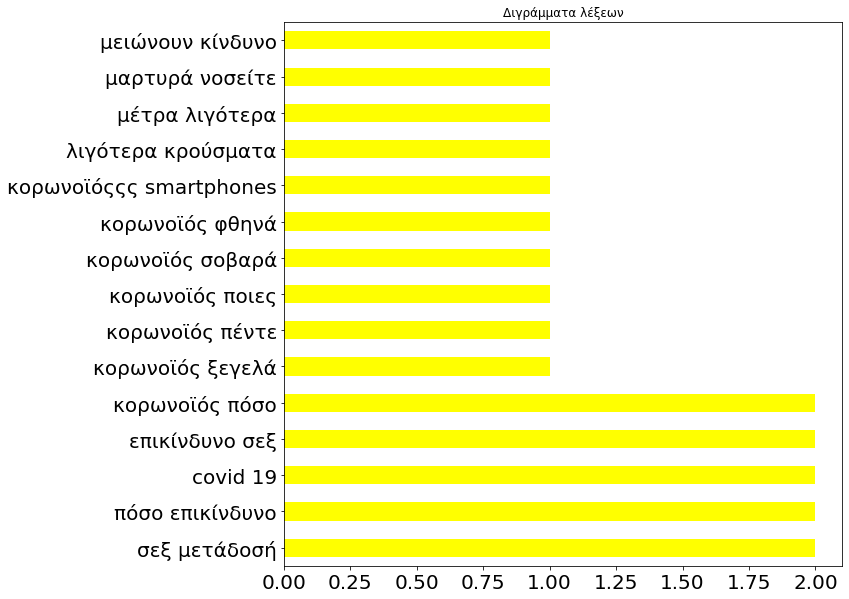

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head (15).plot(kind='barh',color='yellow',figsize=(10,10),title='Διγράμματα λέξεων',fontsize=20)

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head() 

σεξ μετάδοσή       2
πόσο επικίνδυνο    2
covid 19           2
επικίνδυνο σεξ     2
κορωνοϊός πόσο     2
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     token_pattern = '\\bcov[a-z0-9-_]*\\b')  
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,covid-19
0,0
1,0
2,1
3,0
4,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

covid-19    2
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     vocabulary = ['κορωνοϊός', 'φάρμακο',"κρούσματα"])  
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κορωνοϊός,φάρμακο,κρούσματα
0,1,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
#cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
#vocabulary = ['πανδημία', 'ευτυχώς','covid', 'θάνατοι'])  
#count_vector = cv.fit_transform(short_tweets['text'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
#results.head()

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

ευτυχώς    0
θάνατος    0
κρούσμα    0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['headline'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), 
                       columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,19,85,covid,kορωνοϊός,lockdown,smartphones,αδύναμοι,αθώο,ανακοίνωσαν,αντίδοτο,αντιμετωπίζονται,απαραίτητες,απεικονιστικές,απελπισμένοι,απομόνωση,αποτελεσματικό,απροσδόκητο,ασθενείς,ασθενών,αυτοεξέταση,γίνονται,γνωρίζουμε,γνωρίζουν,διαβητικοί,δύο,εμφανίζει,εμφανίζουν,εξετάσεις,επικίνδυνο,εταιρείες,ευαίσθητο,ευνοούν,εύρεση,θανάτου,θεραπείας,θεωρούνται,ιού,ιό,κίνδυνο,καθυστερεί,καιρικές,καρδιά,κατάλληλης,κορωνοϊού,κορωνοϊός,κορωνοϊόςςς,κρούσματα,λιγότερα,μέτρα,μαρτυρά,μειώνουν,μετάδοσή,μιλάμε,μοναξιά,νέο,νιώσουμε,νοσείτε,ξεγελά,οργανισμό,πέντε,παιδιά,ποια,ποιες,προβλήματα,προκαλεί,προφυλαχθούμε,πόσο,σεξ,σημάδι,σοβαρά,στόχος,συμπεριφορά,συμπτώματα,συνθήκες,σύμπτωμα,τρόποι,φάρμακα,φθηνά,όργανο,ύποπτα
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.202533,0.0,0.516955,0.588106,0.588106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.492748,0.0,0.492748,0.000000,0.000000,0.0,0.0,0.492748,0.0,0.0,0.492748,0.000000,0.169693,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.563124,0.0,0.563124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563124,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.220621,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.492748,0.0,0.000000,0.0,0.000000,0.000000,0.492748,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.169693,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492748,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.492748,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.307943,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.307943,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.307943,0.000000,0.0,0.270686,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270686,0.615885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.307943,0.0,0.0,0.0,0.0,0.0,0.000000,0.307943


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.03436846 0.04468302 0.03436846 0.13993251 0.
  0.03535814 0.03949618 0.03082899 0.03436846 0.03082899 0.
  0.03082899 0.03983529 0.03983529 0.03762446 0.03082899 0.03949618
  0.03082899 0.03201047]]


***Cosine Similarity***

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.03436846 0.04468302 0.03436846 0.13993251 0.
  0.03535814 0.03949618 0.03082899 0.03436846 0.03082899 0.
  0.03082899 0.03983529 0.03983529 0.03762446 0.03082899 0.03949618
  0.03082899 0.03201047]
 [0.03436846 1.         0.03743793 0.02879582 0.         0.
  0.02962502 0.03309211 0.02583025 0.02879582 0.02583025 0.
  0.02583025 0.03337623 0.03337623 0.03152387 0.02583025 0.03309211
  0.02583025 0.02682016]
 [0.04468302 0.03743793 1.         0.03743793 0.         0.
  0.03851599 0.04302361 0.03358235 0.03743793 0.03358235 0.
  0.03358235 0.043393   0.043393   0.84203023 0.03358235 0.04302361
  0.03358235 0.03486935]
 [0.03436846 0.02879582 0.03743793 1.         0.         0.
  0.02962502 0.03309211 0.02583025 0.02879582 0.02583025 0.
  0.02583025 0.03337623 0.03337623 0.03152387 0.02583025 0.03309211
  0.02583025 0.02682016]
 [0.13993251 0.         0.         0.         1.         0.
  0.12061941 0.         0.         0.         0.         0.
  0.     

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

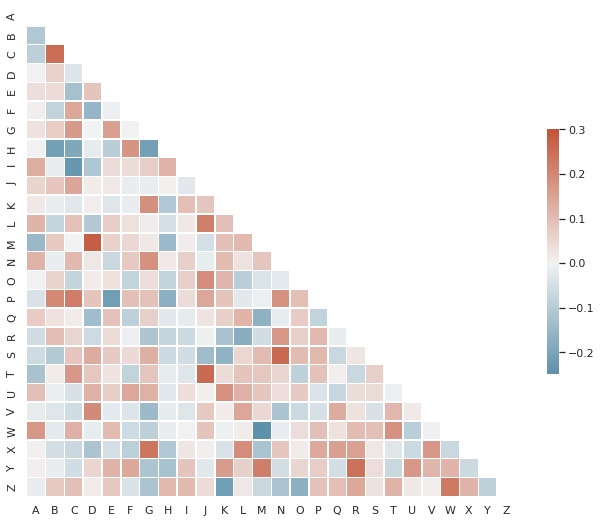

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


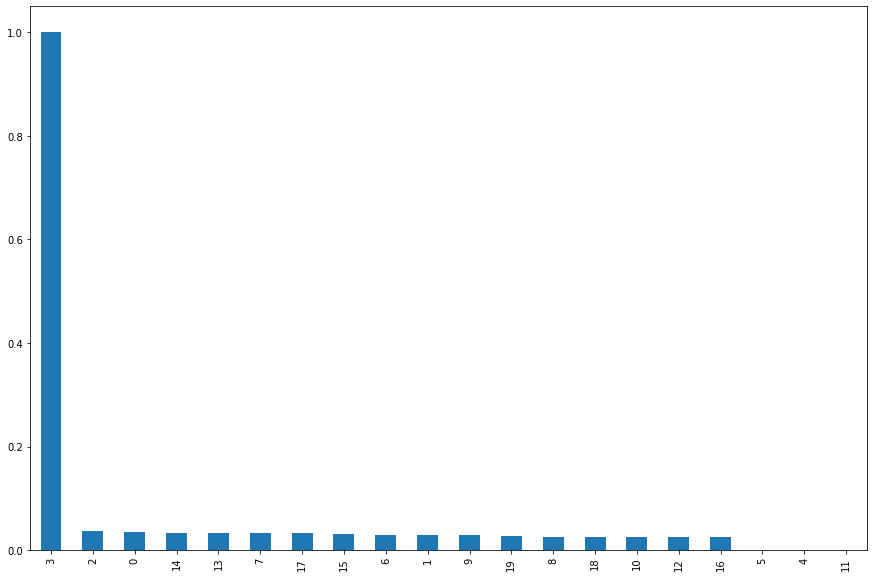

In [ ]:
#pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize=(15,10))

In [ ]:
#πόσα άρθρα εντοπίζονται ανά χρονιά

In [ ]:
df['year'].value_counts()


2020    17
2021     3
Name: year, dtype: int64

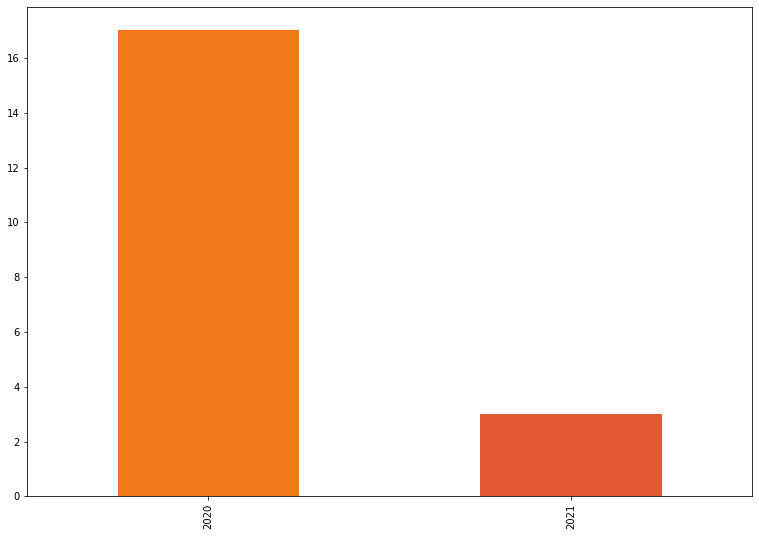

In [ ]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4))
color

df['year'].value_counts(sort=True).plot(kind='bar', color=color, legend=False, figsize=(13, 9))

In [ ]:
from google.colab import files
# Save Figure
plt.savefig("year.png")

# Save Transparent Figure
plt.savefig("year.png", transparent=True)

<Figure size 432x288 with 0 Axes>

In [ ]:
df.dtypes

headline                 object
date        datetime64[ns, UTC]
year                      int64
month                     int64
day                       int64
dtype: object

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['date']))


In [ ]:
df.head()

,headline,date,year,month,day
date,,,,,
2020-03-16 20:31:00+00:00,\nΚορωνοϊός: Μέτρα για λιγότερα κρούσματα\n,2020-03-16 20:31:00+00:00,2020,3,16
2020-04-17 16:30:00+00:00,\nΚορωνοϊός: Γιατί καθυστερεί η εύρεση κατάλλη...,2020-04-17 16:30:00+00:00,2020,4,17
2020-02-16 16:08:27+00:00,\nΚορωνοϊός: Όλα όσα γνωρίζουμε για τον Covid-...,2020-02-16 16:08:27+00:00,2020,2,16
2021-06-22 09:56:00+00:00,\nΚορωνοϊός: Το ευαίσθητο όργανο – στόχος του ...,2021-06-22 09:56:00+00:00,2021,6,22
2020-05-12 13:41:00+00:00,\nΠοια συμπτώματα κορωνοϊού εμφανίζουν τα παιδ...,2020-05-12 13:41:00+00:00,2020,5,12


# **SENTIMENT ANALYSIS**

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


In [ ]:
#Διαβάζουμε το EmoLex

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head

<bound method NDFrame.head of                   word  Positive  Negative  ...  Sadness  Surprise  Trust
0                αφεση       1.0       0.0  ...      0.0       0.0    0.0
1      ενορκη βεβαιωση       0.0       0.0  ...      0.0       0.0    0.0
2              εχοντας       0.0       0.0  ...      0.0       0.0    0.0
3                  εχω       0.0       0.0  ...      0.0       0.0    0.0
4                 οριο       0.0       0.0  ...      0.0       0.0    0.0
...                ...       ...       ...  ...      ...       ...    ...
13166        ουρλιασμα       0.0       1.0  ...      0.0       1.0    0.0
13167     κροκος αυγου       0.0       0.0  ...      0.0       0.0    0.0
13168         νεοτερος       1.0       0.0  ...      0.0       0.0    0.0
13169          ζεφυρος       0.0       0.0  ...      0.0       0.0    0.0
13170             ζουμ       0.0       0.0  ...      0.0       0.0    0.0

[13171 rows x 11 columns]>

In [ ]:

emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:

emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

# **Διαβάζουμε τα Tweets**

In [ ]:
full_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Protothema_tweets.tsv", sep='\t')


In [ ]:
len(full_tweets_df)

3250

In [ ]:
short_tweets = full_tweets_df[['created_at','full_text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )


In [ ]:
short_tweets.tail()

,date,text
3245,Wed Jun 02 03:14:54 +0000 2021,Τουρισμός για όλους: Επιδότηση έως και 100% – ...
3246,Wed Jun 02 03:00:33 +0000 2021,"NBA, Νετς-Σέλτικς 123-109: Οι «Big-3»... καθάρ..."
3247,Wed Jun 02 02:40:08 +0000 2021,Αφγανιστάν: Tουλάχιστον 6 νεκροί από βόμβα σε ...
3248,Wed Jun 02 02:39:00 +0000 2021,Ληστεία στο Μαρκόπουλο Αττικής: Εμφανίστηκε ξα...
3249,Wed Jun 02 01:57:35 +0000 2021,Πανδημια-Ισημερινός: Σε εφαρμογή τίθεται το σχ...


In [ ]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")


In [ ]:
short_tweets.head()


,date,text
0,2021-07-01 12:45:04,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...
1,2021-07-01 12:36:54,"Wimbledon, 2ος γύρος, Σάκκαρη- Ρότζερς 0-2 (5-..."
2,2021-07-01 12:34:42,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...
3,2021-07-01 12:30:47,Ταϊλάνδη: Άνοιξε και πάλι για τους τουρίστες τ...
4,2021-07-01 12:22:34,Βρετανία: Μυστήριο με δεκάδες θανάτους βρεφών ...


In [ ]:
short_tweets.head()



,date,text
0,2021-07-01 12:45:04,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...
1,2021-07-01 12:36:54,"Wimbledon, 2ος γύρος, Σάκκαρη- Ρότζερς 0-2 (5-..."
2,2021-07-01 12:34:42,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...
3,2021-07-01 12:30:47,Ταϊλάνδη: Άνοιξε και πάλι για τους τουρίστες τ...
4,2021-07-01 12:22:34,Βρετανία: Μυστήριο με δεκάδες θανάτους βρεφών ...


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(3250, 13161)

In [ ]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
short_tweets.head(3)

,date,text
0,2021-07-01 12:45:04,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...
1,2021-07-01 12:36:54,"Wimbledon, 2ος γύρος, Σάκκαρη- Ρότζερς 0-2 (5-..."
2,2021-07-01 12:34:42,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...


In [ ]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_tweets


,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-07-01 12:45:04,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...,0,0,0,0,0,0,0,0,0,0
1,2021-07-01 12:36:54,"Wimbledon, 2ος γύρος, Σάκκαρη- Ρότζερς 0-2 (5-...",0,0,0,0,0,0,1,0,0,0
2,2021-07-01 12:34:42,ΕΜΑ: Τα τέσσερα εμβόλια που χορηγούνται στην Ε...,0,0,0,0,0,0,0,0,0,0
3,2021-07-01 12:30:47,Ταϊλάνδη: Άνοιξε και πάλι για τους τουρίστες τ...,0,0,0,0,0,0,0,0,0,0
4,2021-07-01 12:22:34,Βρετανία: Μυστήριο με δεκάδες θανάτους βρεφών ...,0,0,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,2021-06-02 03:14:54,Τουρισμός για όλους: Επιδότηση έως και 100% – ...,1,1,1,1,0,0,1,0,1,0
3246,2021-06-02 03:00:33,"NBA, Νετς-Σέλτικς 123-109: Οι «Big-3»... καθάρ...",1,0,0,0,0,1,0,0,1,0
3247,2021-06-02 02:40:08,Αφγανιστάν: Tουλάχιστον 6 νεκροί από βόμβα σε ...,1,1,1,0,1,0,0,1,1,1
3248,2021-06-02 02:39:00,Ληστεία στο Μαρκόπουλο Αττικής: Εμφανίστηκε ξα...,1,0,0,1,1,0,0,1,1,1


In [ ]:
short_tweets.set_index('date' , inplace=True)

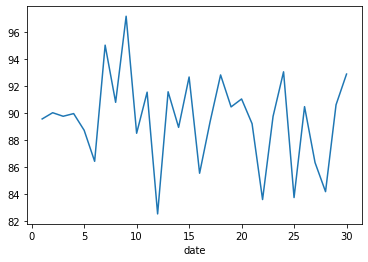

In [ ]:
short_tweets['text'].str.len().groupby(by=short_tweets.index.day).mean().plot()


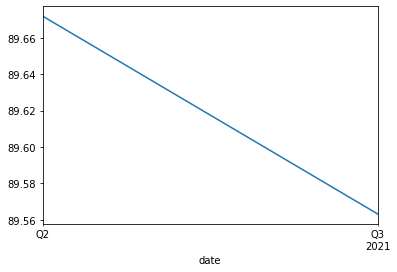

In [ ]:
short_tweets['text'].str.len().resample('Q').mean().plot()


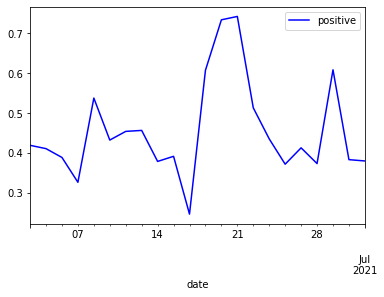

In [ ]:
short_tweets['positivity'].resample('B').mean().plot(color= 'b', label= 'positive').legend()


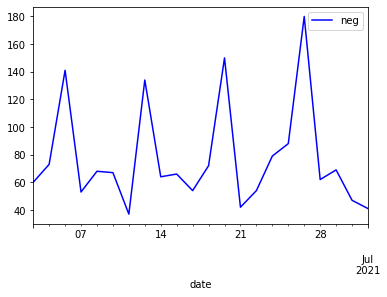

In [ ]:
short_tweets['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend()


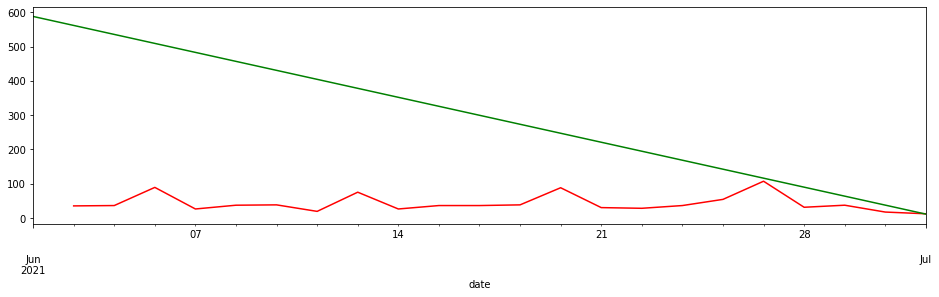

In [ ]:
ax = short_tweets['anger'].resample('B').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

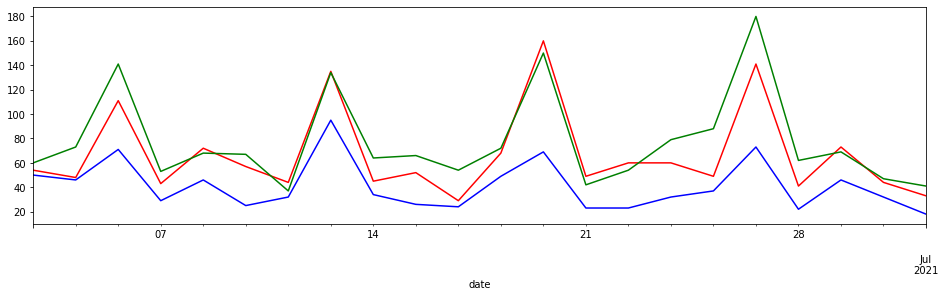

In [ ]:
ax = short_tweets['positivity'].resample('B').sum().plot(figsize=(16,4), color = 'red')
short_tweets['negative'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['trust'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')